# HOUSE RATING, Kaggle

## Gonzalo Romero Navarro

es.linkedin.com/in/gromeronavarro

### The first appproach that will be done for this project is to train a model with the raw data.
### After the first approcach, we will have a metric value to improve, and all the feature engineering will be done in order to improve the metric value iteratively. 

#### Load the data and take a look

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('train.csv', index_col=0)

In [3]:
df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


After this first look of the data, we will do the first approach with the Numeric values.
 - We will drop the 'text' features.
 - We will drop the samples with NaN values.

In [4]:
num_features = [
 'MSSubClass'
 ,'LotFrontage'
 ,'LotArea'
 ,'OverallQual'
 ,'OverallCond'
 ,'YearBuilt'
 ,'YearRemodAdd'
 ,'BsmtFinSF1'
 ,'BsmtFinSF2'
 ,'BsmtUnfSF'
 ,'TotalBsmtSF'
 ,'1stFlrSF'
 ,'2ndFlrSF'
 ,'LowQualFinSF'
 ,'GrLivArea'
 ,'BsmtFullBath'
 ,'BsmtHalfBath'
 ,'FullBath'
 ,'HalfBath'
 ,'BedroomAbvGr'
 ,'KitchenAbvGr'
 ,'TotRmsAbvGrd'
 ,'Fireplaces'
 ,'GarageYrBlt'
 ,'GarageCars'
 ,'GarageArea'
 ,'WoodDeckSF'
 ,'OpenPorchSF'
 ,'EnclosedPorch'
 ,'3SsnPorch'
 ,'ScreenPorch'
 ,'PoolArea'
 ,'MiscVal'
 ,'MoSold'
 ,'YrSold'
 ,'SalePrice'
]

In [5]:
#Let's see the NaN values
df_1 = df[num_features]
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 36 columns):
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
Fireplaces       1460 non-null int64
GarageYrBlt      1379 non-null float64
G

As we can see, with these features, there are not almost NaN values. There are only NaN values in 'LotFrontage'  and   'GarageYrBlt', which have 259 and 81 NaN values.

- For 'LotFrontage' we have decide to drop such feature for the first approach, since we would have to drop almost 18% of the samples, which we consider that is a big part of them.

- For 'GarageYrBlt' we have decided to drop the sample with NaN values since they are only the 5.5% of the samples

In [6]:
#Drop 'LotFrontage' feature
df_1.drop('LotFrontage', axis=1, inplace=True)

C:\Users\Aeroengy\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [7]:
#Drop the samples with NaN values in the feature 'GarageYrBlt'
df_1.dropna(inplace=True)
df_1.shape

C:\Users\Aeroengy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(1379, 35)

Before train the model, we are goin to check there is not duplicates. This is a kaggle dataset, so there is not supposed to be any duplicate but it easy to check that.

In [8]:
df_1[df_1.duplicated()].shape

(0, 35)

Now that we have drop NaN values and check if there is any duplicate sample we are ready to train our firt model.

This is a typical exercise for regresion, so we will use Gradient Boosting regresion with Scikit-learn.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X1 = df_1.iloc[:,df_1.columns != 'SalePrice']
y1 = df_1['SalePrice']

In [11]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.2)

In [12]:
print(X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape)

(1103, 34) (276, 34) (1103,) (276,)


In [13]:
from sklearn.ensemble import GradientBoostingRegressor

In [14]:
model = GradientBoostingRegressor()

In [15]:
model.fit(X1_train, y1_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [16]:
y1_predicted = model.predict(X1_test)

In [17]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [18]:
RMSE_1 = sqrt(mean_squared_error(y1_test, y1_predicted))
RMSE_1

23142.141870558746

In [19]:
import numpy as np

In [20]:
t = pd.read_csv("test.csv", index_col=0)
t = t[num_features[:-1]]
t.drop('LotFrontage', axis=1, inplace=True)
t.fillna(0, inplace=True)
test_predicted = model.predict(t)
test_predicted = pd.DataFrame({'SalePrice' : test_predicted}, index=t.index)
test_predicted.to_csv("test_predicted.csv", sep=',')

Our first approach gives us a RMSE = 35657.57. Now, what we to do is improve such metric values with the following steps:
- Feature selection, feature engineering, etc.
- Hyperparameters selection.

#### First of all, we will proceed with the EDA (Exploratory Data Analysis) in order to see what we can do with the features.

A brief look

My approach is to start with the numeric features, once they have been managed we can proceed with the text features.

In [22]:
import gonza_eda as gonza

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


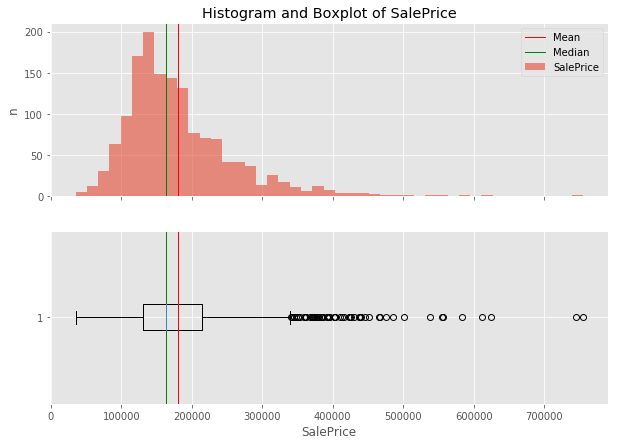

In [23]:
gonza.plot_target(df, 'SalePrice')

In [24]:
num_features = [
 'LotFrontage'
 ,'LotArea'
 ,'BsmtFinSF1'
 ,'BsmtFinSF2'
 ,'BsmtUnfSF'
 ,'TotalBsmtSF'
 ,'1stFlrSF'
 ,'2ndFlrSF'
 ,'LowQualFinSF'
 ,'GrLivArea'
 ,'GarageArea'
 ,'WoodDeckSF'
 ,'OpenPorchSF'
 ,'EnclosedPorch'
 ,'3SsnPorch'
 ,'ScreenPorch'
 ,'PoolArea'
 ,'MiscVal'
]

In [25]:
disc_features = [
 'MSSubClass'
 ,'OverallQual'
 ,'OverallCond'
 ,'BsmtFullBath'
 ,'BsmtHalfBath'
 ,'FullBath'
 ,'HalfBath'
 ,'BedroomAbvGr'
 ,'KitchenAbvGr'
 ,'TotRmsAbvGrd'
 ,'Fireplaces'
 ,'GarageCars'
 ,'MoSold'

]

In [26]:
yr_features = [
 'YearBuilt'
 ,'YearRemodAdd'
 ,'GarageYrBlt'
 ,'YrSold'
]

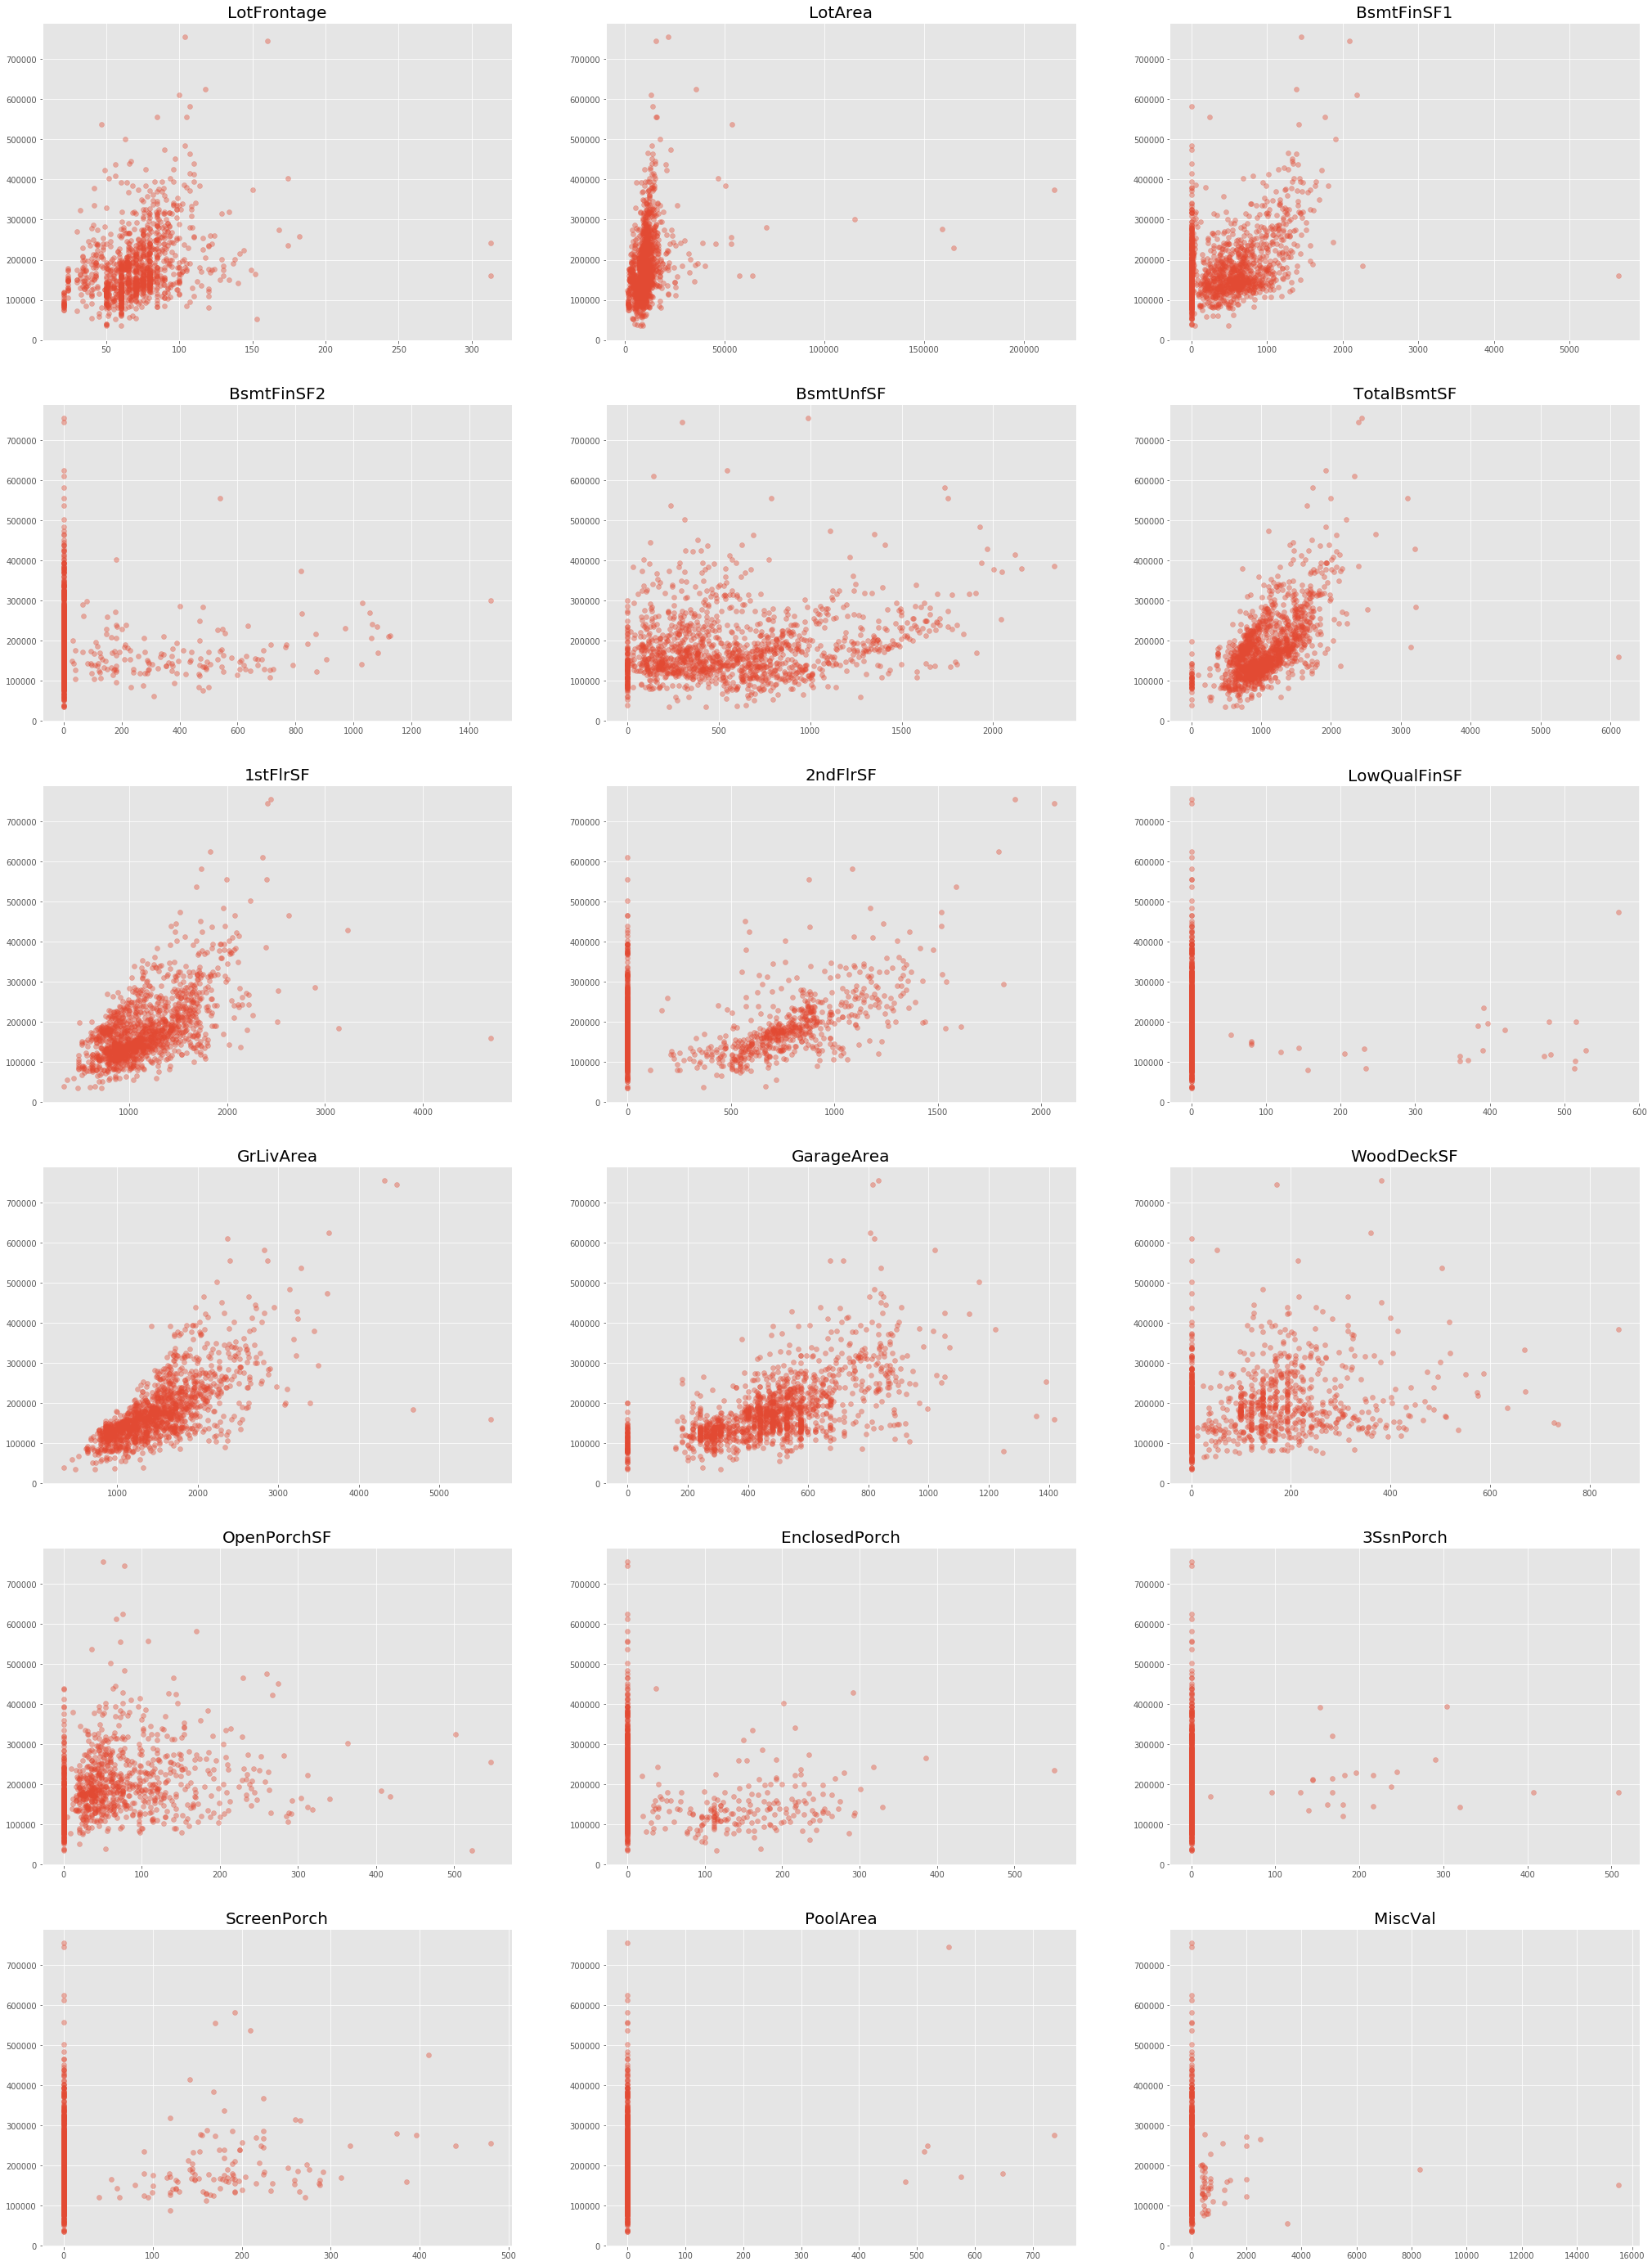

In [27]:
gonza.plot_cont_features(df, num_features, 'SalePrice')

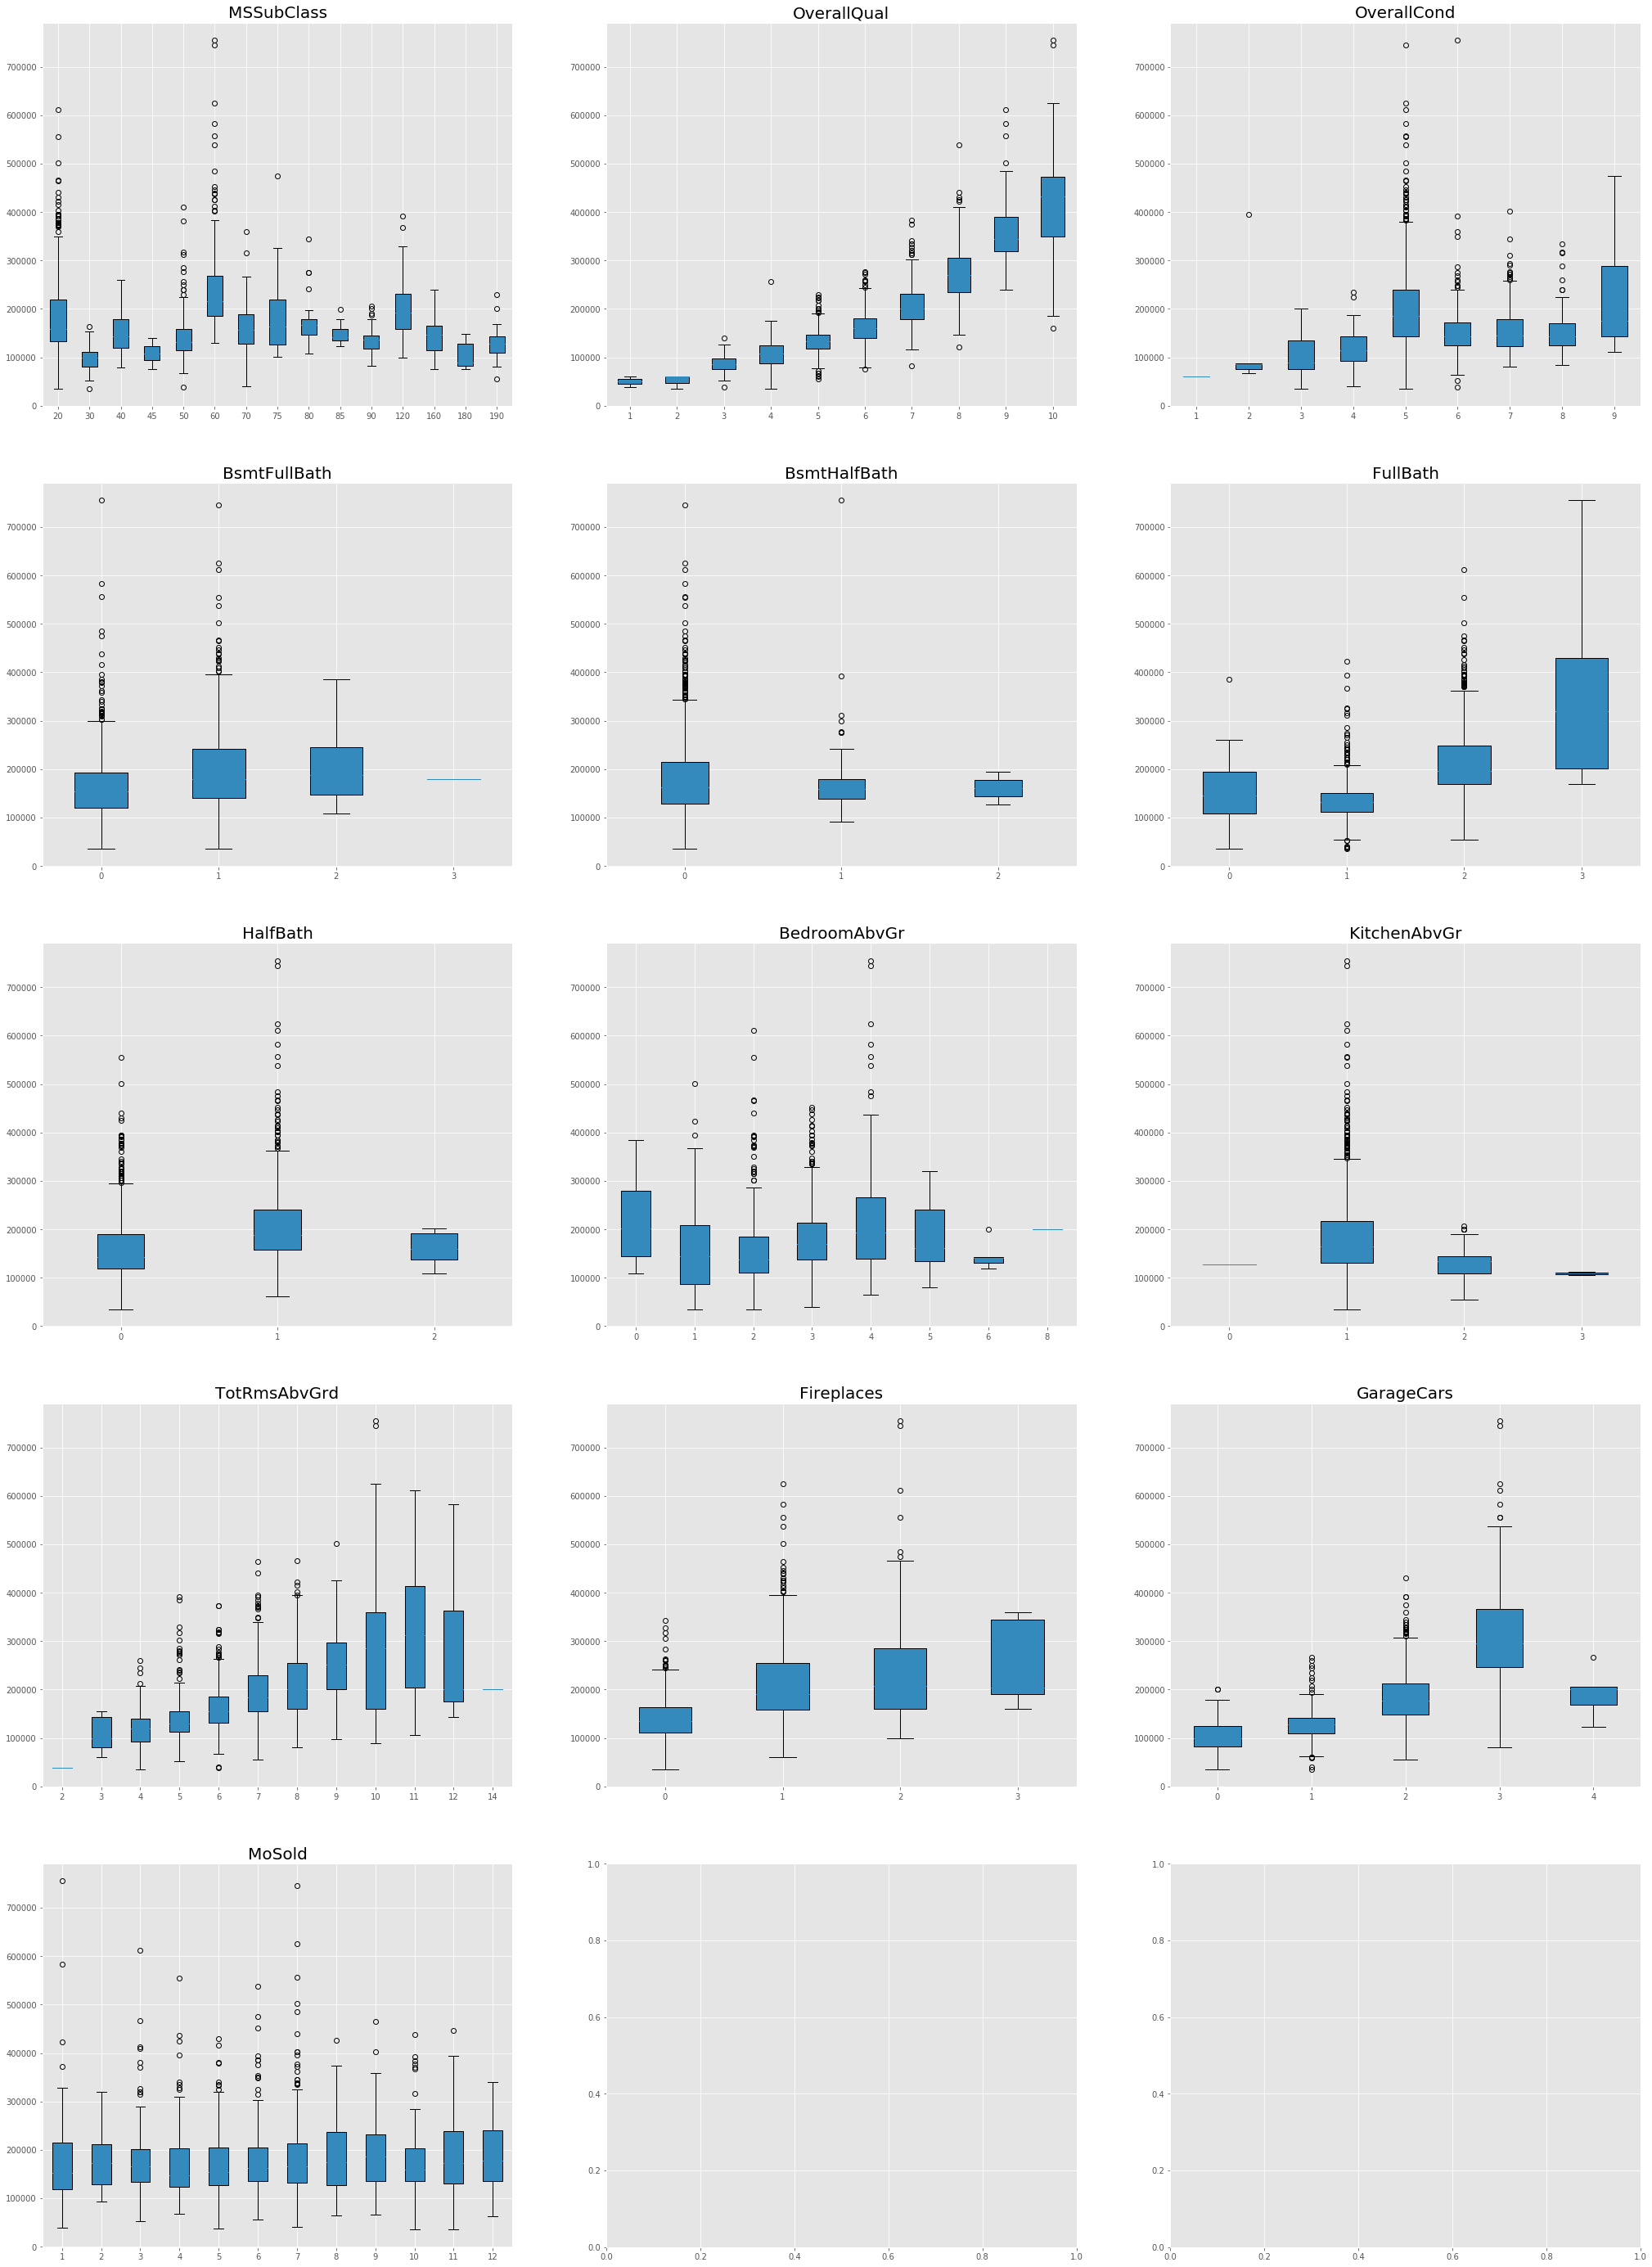

In [28]:
gonza.plot_disc_features(df, disc_features, 'SalePrice')

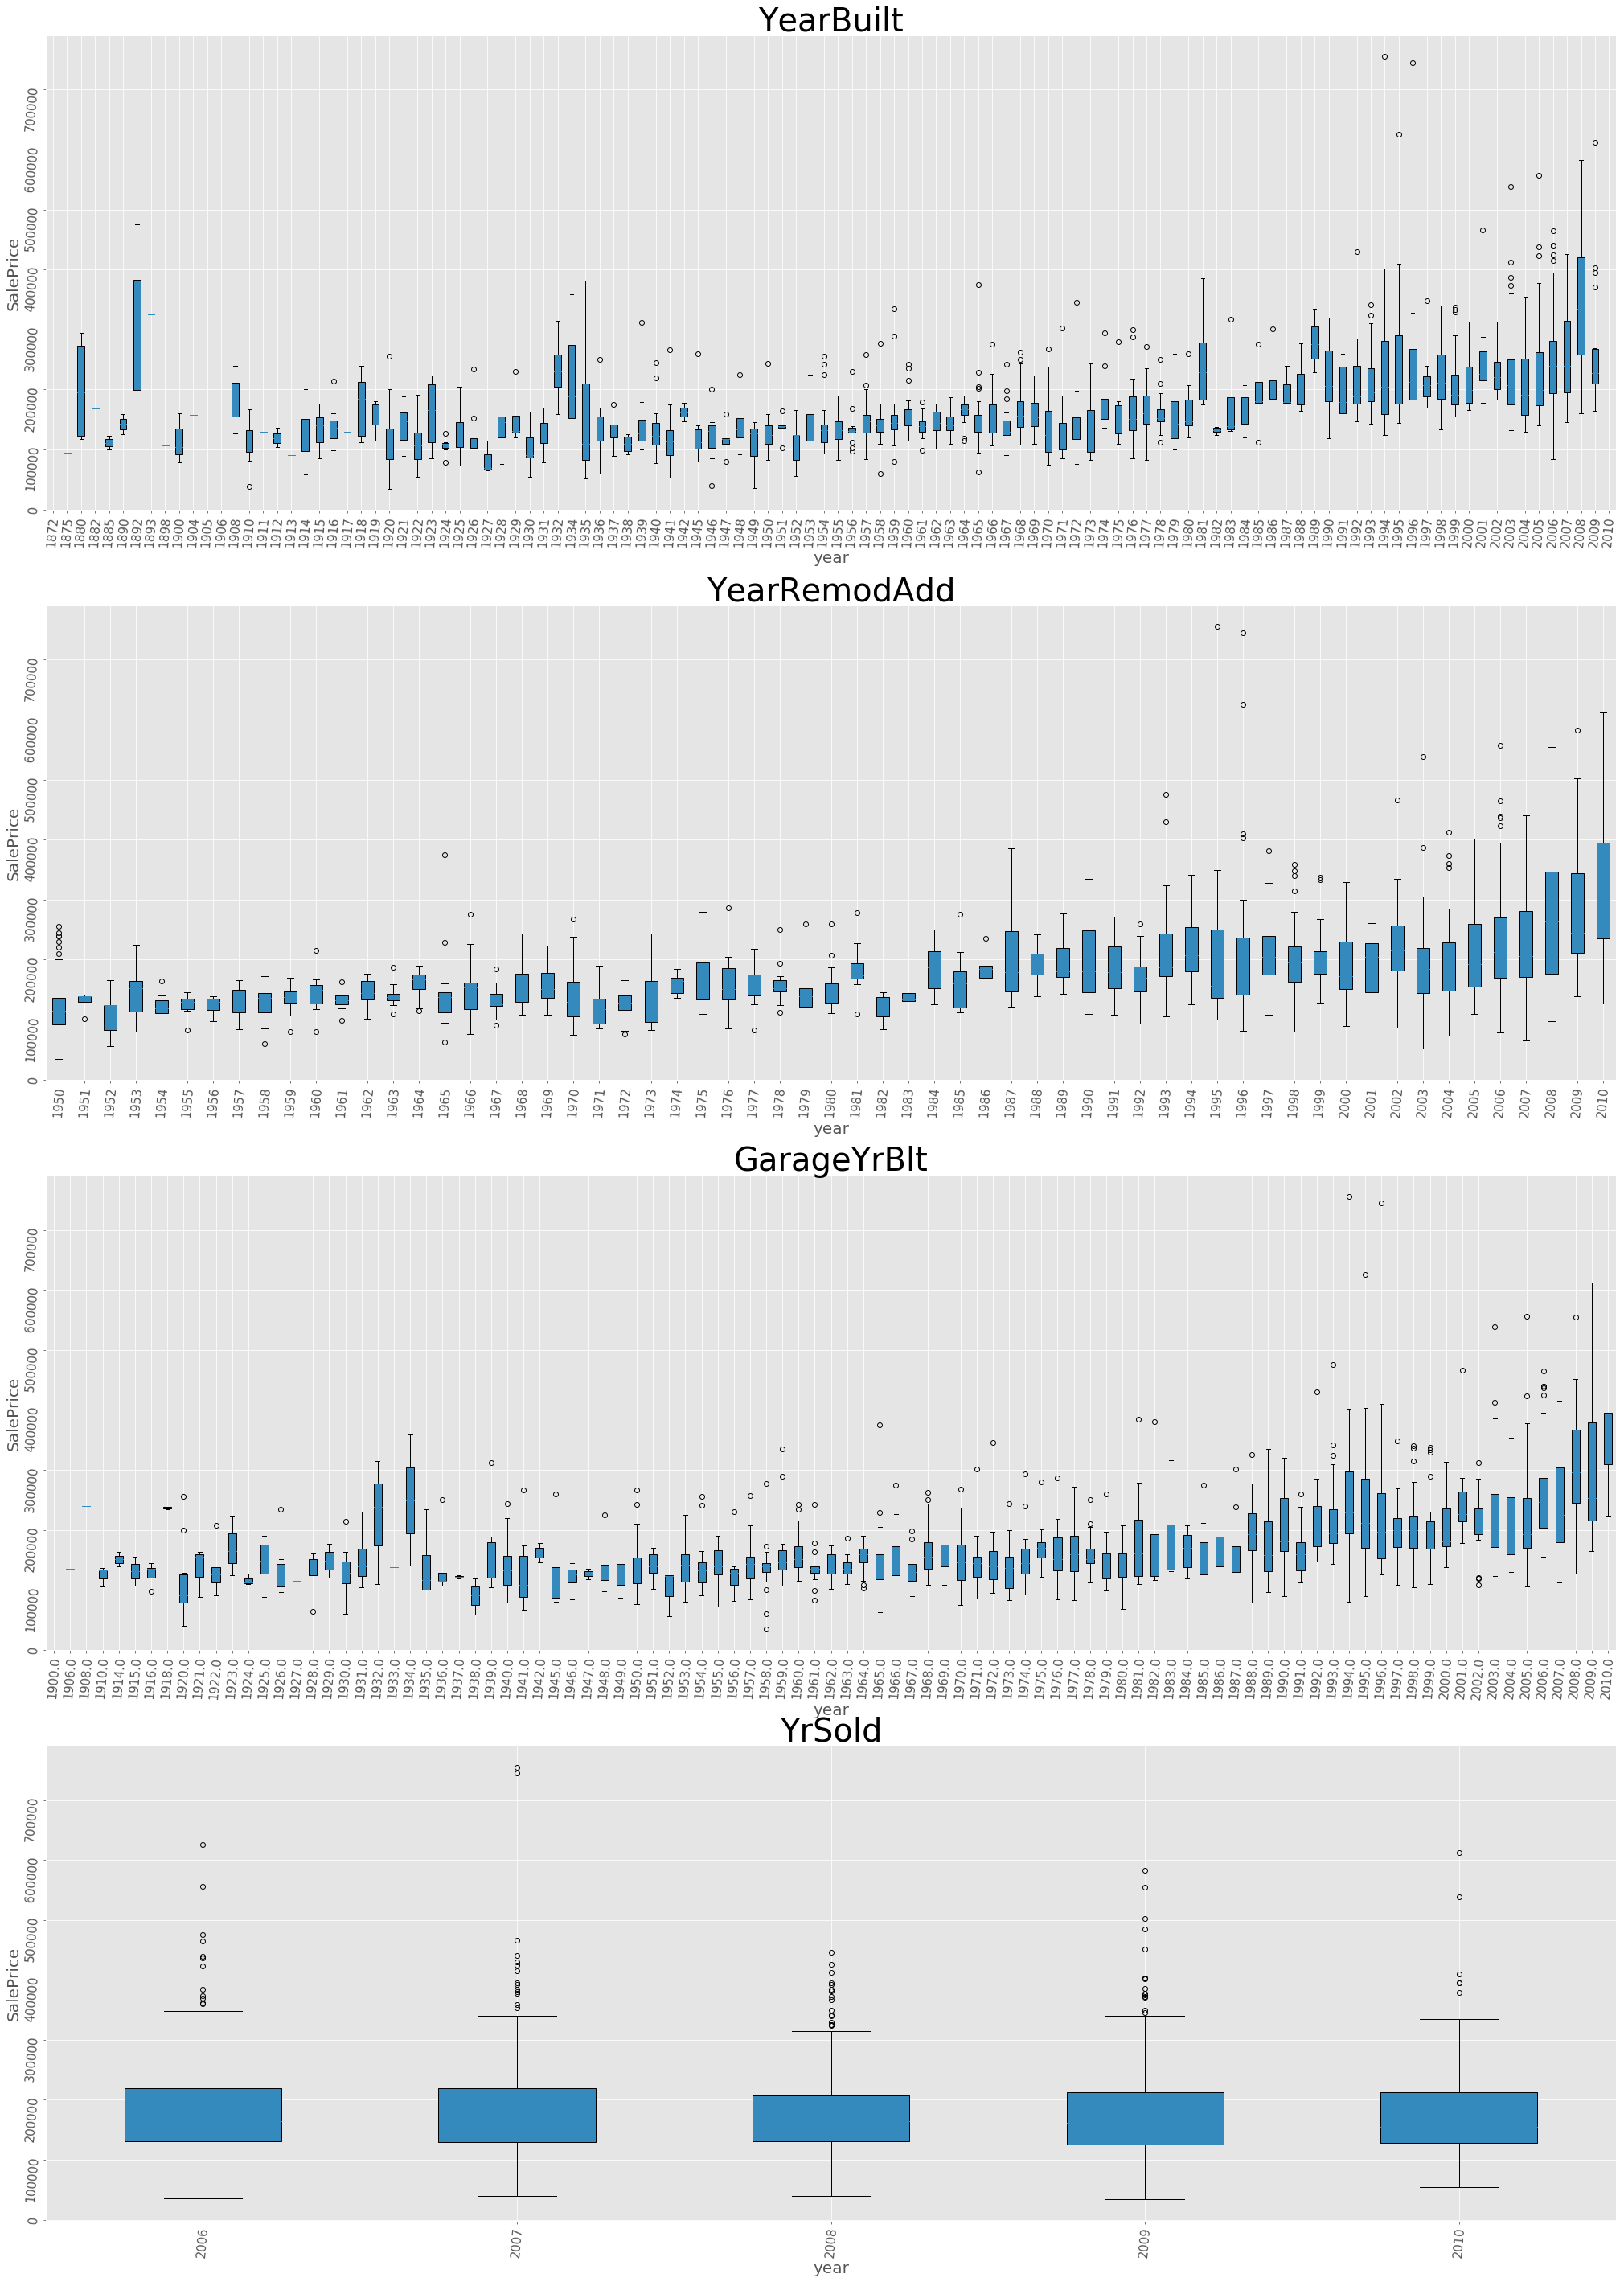

In [29]:
gonza.plot_year_features(df, yr_features, 'SalePrice')

Features: '1stFlrSF' and  '2ndFlrSF'

In [37]:
from sklearn import linear_model

In [38]:
aux_model = linear_model.LinearRegression()
aux_model.fit(df['1stFlrSF'].values.reshape(-1, 1), df['SalePrice'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
aux_model_ = linear_model.LinearRegression()
aux_model_.fit(df['2ndFlrSF'][df['2ndFlrSF'] != 0].values.reshape(-1, 1), df['SalePrice'][df['2ndFlrSF'] != 0])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [ ]:
from sklearn import linear_model

def plot_features_scatter_regression(df, x_list, y):
    aux_model = linear_model.LinearRegression()

    for feature in x_list:

        
    
    

''

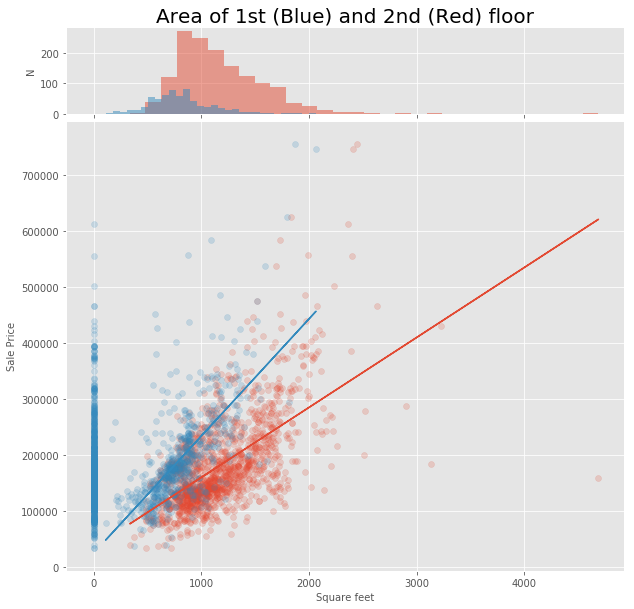

In [46]:
fix, ax = plt.subplots(figsize=(10,10))

ax.scatter(df['1stFlrSF'], df['SalePrice'], alpha=0.2)
ax.scatter(df['2ndFlrSF'], df['SalePrice'], alpha=0.2)
divider = make_axes_locatable(ax)
axHistx = divider.append_axes("top", 1.2, pad=0.1, sharex=ax)

ax.plot(df['1stFlrSF'], aux_model.predict(df['1stFlrSF'].values.reshape(-1, 1)))
ax.plot(df['2ndFlrSF'][df['2ndFlrSF'] != 0], aux_model_.predict(df['2ndFlrSF'][df['2ndFlrSF'] != 0].values.reshape(-1, 1)))

axHistx.xaxis.set_tick_params(labelbottom=False)

axHistx.set_title("Area of 1st (Blue) and 2nd (Red) floor", fontsize=20)
ax.set_xlabel("Square feet", fontsize=10)
ax.set_ylabel("Sale Price", fontsize=10)
axHistx.set_ylabel("N", fontsize=10)

bins=30
axHistx.hist(df['1stFlrSF'], bins=bins, alpha=0.5)
axHistx.hist(df['2ndFlrSF'][df['2ndFlrSF'] != 0], bins=bins, alpha=0.5)

;